In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sqlfunctions import get_datapunten_voor_model


## Notities
Datapunten AI:
- omzet
- Beursgenoteerd of niet
- sector (nacebel code)
- aantal personeelsleden
- hoofdsteden provincies

In [2]:
# Zet alle data in pd dataframe
# dataframe.set_index('ondernemingnr', inplace=True)
# TODO: 
# - 'site_aanwezig', 'pdf_aanwezig' -> later toevoegen en kijken of dit de accuracy verbeterd
data = get_datapunten_voor_model()
dataframe = pd.DataFrame(data, columns=['ondernemingnr', 'omzet' ,'beursgenoteerd', 'sector', 'personeelsleden', 'hoofdsteden_provincies', 'site_aanwezig', 'pdf_aanwezig', 'score'])
dataframe

,ondernemingnr,omzet,beursgenoteerd,sector,personeelsleden,hoofdsteden_provincies,site_aanwezig,pdf_aanwezig,score
0,0458458325,12299679.0,False,Rust- en verzorgingstehuizen (R.V.T.),157.0,Roeselare,1,1,0.009328
1,0458458325,12299679.0,False,Rust- en verzorgingstehuizen (R.V.T.),157.0,Roeselare,1,1,0.000000
2,0449500473,8490472.0,False,Bouwmarkten en andere doe-het-zelfzaken in bou...,19.0,Antwerpen,0,1,0.005565
3,0449500473,8490472.0,False,Bouwmarkten en andere doe-het-zelfzaken in bou...,19.0,Antwerpen,0,1,0.004333
4,0449500473,8490472.0,False,Bouwmarkten en andere doe-het-zelfzaken in bou...,19.0,Antwerpen,0,1,0.000000
...,...,...,...,...,...,...,...,...,...
39837,0894952979,1857912.0,False,Detailhandel in andere motorvoertuigen (groter...,24.0,Maaseik,1,1,0.005810
39838,0894952979,1857912.0,False,Detailhandel in andere motorvoertuigen (groter...,24.0,Maaseik,1,1,0.000000
39839,0898270478,612383.0,False,"Teelt van groenten, meloenen en wortel- en kno...",14.0,Mechelen,1,1,0.003220
39840,0898270478,612383.0,False,"Teelt van groenten, meloenen en wortel- en kno...",14.0,Mechelen,1,1,0.004327


In [5]:
# score als sum van alle scores
dataframe = dataframe.groupby('ondernemingnr').agg({'omzet': 'first', 'beursgenoteerd': 'first', 'sector': 'first', 'personeelsleden': 'first', 'hoofdsteden_provincies': 'first', 'site_aanwezig': 'first', 'pdf_aanwezig': 'first', 'score': 'sum'}).reset_index()


In [ ]:
dataframe.set_index('ondernemingnr', inplace=True)


In [10]:
print(dataframe["site_aanwezig"].value_counts())
print(dataframe["pdf_aanwezig"].value_counts())

# rows that both have a site and a pdf
len(dataframe[(dataframe['site_aanwezig'] == 1) & (dataframe['pdf_aanwezig'] == 1)])

1    9057
0    4224
Name: site_aanwezig, dtype: int64
1    12517
0      764
Name: pdf_aanwezig, dtype: int64


8498

In [ ]:
# categorize sector
dataframe["sector"] = dataframe["sector"].astype('category')
# get amount of different sectors
sectors = dataframe["sector"].cat.categories
# how are the sectors distributed ?
dataframe["sector"].value_counts()


In [19]:
# Data preprocessing
from sklearn.preprocessing import OrdinalEncoder

# encode sector
dataframe["sector"] = dataframe["sector"].astype('category')
ordinal_encoder = OrdinalEncoder()
dataframe["sector"] = ordinal_encoder.fit_transform(dataframe[["sector"]])
dataframe["sector"] = dataframe["sector"].astype(int)

# encode hoofdsteden_provincies
dataframe["hoofdsteden_provincies"] = dataframe["hoofdsteden_provincies"].astype('category')
ordinal_encoder = OrdinalEncoder()
dataframe["hoofdsteden_provincies"] = ordinal_encoder.fit_transform(dataframe[["hoofdsteden_provincies"]])
dataframe["hoofdsteden_provincies"] = dataframe["hoofdsteden_provincies"].astype(int)


dataframe["beursgenoteerd"] = dataframe["beursgenoteerd"].astype(int)
len(dataframe[dataframe["beursgenoteerd"] == 1])
# Maar 17 beursgenoteerde bedrijven

dataframe["personeelsleden"] = dataframe["personeelsleden"].astype(int)

dataframe



,ondernemingnr,omzet,beursgenoteerd,sector,personeelsleden,hoofdsteden_provincies,site_aanwezig,pdf_aanwezig,score
0,0200065765,13199521.0,0,378,27,6,1,1,0.144505
1,0200305493,18100623.0,1,378,63,0,1,1,0.025213
2,0200762878,9164977.0,0,13,153,1,0,1,0.009135
3,0200881951,8482006.0,0,377,47,7,1,1,0.055926
4,0204212714,15288774.0,0,378,86,20,1,1,0.123986
...,...,...,...,...,...,...,...,...,...
13276,0899886915,878003.0,0,99,10,1,0,1,0.011995
13277,0899901563,0.0,0,496,52,18,1,0,0.002873
13278,0899925715,34273975.0,0,556,23,10,0,1,0.008425
13279,0899980054,5570672.0,0,373,30,6,1,1,0.016554


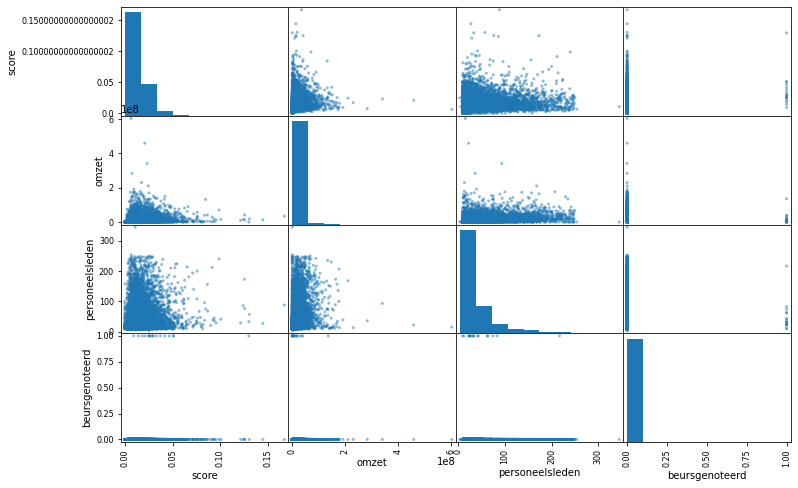

                    omzet  beursgenoteerd    sector  personeelsleden  \
omzet            1.000000        0.014866  0.026696         0.359550   
beursgenoteerd   0.014866        1.000000  0.008186         0.009871   
sector           0.026696        0.008186  1.000000         0.069911   
personeelsleden  0.359550        0.009871  0.069911         1.000000   
site_aanwezig    0.105564        0.001840  0.048481         0.089179   
pdf_aanwezig     0.134077       -0.000200 -0.002774        -0.012663   
score            0.185001        0.077363  0.011719         0.166983   

                 site_aanwezig  pdf_aanwezig     score  
omzet                 0.105564      0.134077  0.185001  
beursgenoteerd        0.001840     -0.000200  0.077363  
sector                0.048481     -0.002774  0.011719  
personeelsleden       0.089179     -0.012663  0.166983  
site_aanwezig         1.000000     -0.026378  0.358539  
pdf_aanwezig         -0.026378      1.000000  0.087939  
score                 0.

In [17]:
# plot correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataframe.corr()
corr["score"].sort_values(ascending=False)
from pandas.plotting import scatter_matrix
attributes = ["score", "omzet", "personeelsleden", "beursgenoteerd"]
scatter_matrix(dataframe[attributes], figsize=(12, 8))
plt.show()


print(corr)



In [33]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13281 entries, 0 to 13280
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ondernemingnr           13281 non-null  object 
 1   omzet                   13281 non-null  float64
 2   beursgenoteerd          13281 non-null  int32  
 3   sector                  13281 non-null  int32  
 4   personeelsleden         13281 non-null  int32  
 5   hoofdsteden_provincies  13281 non-null  int32  
 6   site_aanwezig           13281 non-null  int64  
 7   pdf_aanwezig            13281 non-null  int64  
 8   score                   13281 non-null  float64
dtypes: float64(2), int32(4), int64(2), object(1)
memory usage: 726.4+ KB


![white box ml modellen](https://drek4537l1klr.cloudfront.net/thampi/HighResolutionFigures/figure_2-2.png)


In [44]:
# Model schrijven
# ! Kan pas gerund worden vanaf we alle data hebben
X = dataframe.drop(columns=["score", "ondernemingnr"])
y = dataframe["score"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# y_train.info()
X_train.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11952 entries, 8918 to 7270
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   omzet                   11952 non-null  float64
 1   beursgenoteerd          11952 non-null  int32  
 2   sector                  11952 non-null  int32  
 3   personeelsleden         11952 non-null  int32  
 4   hoofdsteden_provincies  11952 non-null  int32  
 5   site_aanwezig           11952 non-null  int64  
 6   pdf_aanwezig            11952 non-null  int64  
dtypes: float64(1), int32(4), int64(2)
memory usage: 560.2 KB
<class 'pandas.core.series.Series'>
Int64Index: 1329 entries, 6417 to 9988
Series name: score
Non-Null Count  Dtype  
--------------  -----  
1329 non-null   float64
dtypes: float64(1)
memory usage: 20.8 KB


In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import svm

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)



classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
]
# find out which classifier is the best
best = 9999
best_clf = ""
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__,
            mean_squared_error(y_test, y_pred)) 
    if mean_squared_error(y_test, y_pred) < best:
        best = mean_squared_error(y_test, y_pred)
        best_clf = clf

print(f"best_clf: {best_clf.__class__.__name__} with mean_squared_error: {best}")


    


SVR 0.004955751266168191
SGDRegressor 1.0785318711746402e+45
BayesianRidge 8.373933461470826e-05
LassoLars 9.856448865043072e-05
ARDRegression 9.856448865043072e-05
PassiveAggressiveRegressor 0.0003575973576944026
TheilSenRegressor 8.722605931927772e-05
LinearRegression 8.373738866891148e-05
best_clf: LinearRegression with mean_squared_error: 8.373738866891148e-05
